<a href="https://colab.research.google.com/github/AYYasaswini/testmyprojectAI/blob/master/Copy_of_Assignment3_accu_99_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


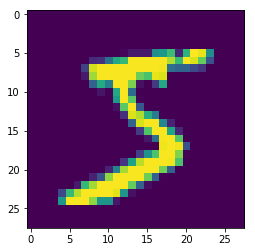

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)


32*32 * 9 +32

32 * 10* 1 + 10 
10 * 10 *16 *16 +10


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320        #############   32  * 10
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      #############  32 * 32 * 3*  3 + 32
=================================================================
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0

In [0]:
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) # 32 * 10 = 320 RF =3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu' , use_bias=False))  # 32 * 32 * 3* 3 + 32  | RF = 26 X 26 RF =5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu', use_bias=False))   # 32 * 32 * 3* 3 + 32  | RF = 24 X 24  RF = 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # RF =14

model.add(Convolution2D(20, 1, 1, activation='relu', use_bias=False))   # 32 * 32 * 3* 3 + 32  | RF = 24 X 24 RF = 14 or 15
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3,  activation='relu', use_bias=False))    # 32 * 32 * 3* 3 + 32  | RF = 12 X 12 RF = 16 
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(20, 3, 3,  activation='relu',use_bias=False))  # RF = 18
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(11, 1, activation='relu', use_bias=False)) #summation of features  RF =18
model.summary()
# 10 reporesents no of classes 7 is the filter size or kernel size.7 x 7 convolution is done here.
model.add(Convolution2D(10,7, use_bias=False))  # 10 *10 * 16 *16 + 10  RF 
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", use_bias=False)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 20)        1800      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 10)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
hist = model.fit(X_train, Y_train, batch_size=35, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

#hist = model.fit(x, y, validation_split=0.2)
print(hist.history)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.2017 - acc: 0.9351 - val_loss: 0.0497 - val_acc: 0.9845
Epoch 2/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0658 - acc: 0.9796 - val_loss: 0.0412 - val_acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0503 - acc: 0.9837 - val_loss: 0.0322 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0429 - acc: 0.9865 - val_loss: 0.0318 - val_acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0392 - acc: 0.9877 - val_loss: 0.0290 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0341 - acc: 0.9891 - val_loss: 0.0272 - val_acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0321 - acc: 0.9900 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
#model.layers
#layer_dict
layer_conv2d = []
for layer in model.layers:
  layer_conv2d.append(layer.name)
layer_conv2d[0] 

In [0]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = layer_conv2d[1]):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()